## Setup

<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1yu5U0X0LNqQ6sQyFcPMlWnVj2D6eWV7m?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [2]:
# Python ≥3.5 is required
import sys

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn

## Get the Data

The function below merges the OECD's life satisfaction data and the IMF's GDP per capita data. We have discussed this example in class.

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Fetch the files in datasets/lifesat

In [5]:
import os
datapath = os.path.join("datasets", "lifesat", "")

[Uncomment the code] Code below plots pretty figures directly within Jupyter


In [6]:
% matplotlib inline
% import matplotlib as mpl
% mpl.rc('axes', labelsize=14)
% mpl.rc('xtick', labelsize=12)
% mpl.rc('ytick', labelsize=12)

UsageError: Line magic function `%import` not found.


Download the data

In [7]:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

# Fill in the missing code


,GDP per capita,Life satisfaction
GDP per capita,1.000000,0.856996
Life satisfaction,0.856996,1.000000



Output [[5.96242338]]


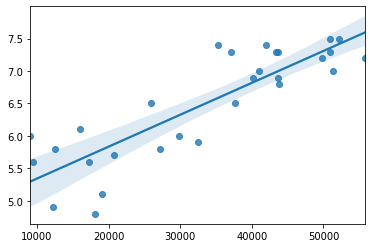

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model
import seaborn as sns

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
distributionInit = pd.DataFrame(country_stats,columns=['GDP per capita','Life satisfaction'])
correlationMatrix = distributionInit.corr()
display(correlationMatrix)
print("")
sns.regplot(x=X,y=y)

# Select a linear model
regression = linear_model.LinearRegression()

# Train the model
regression.fit(X, y)

# Make a prediction for Cyprus
newData = {
    'GDP per capita' : [22587.0]
}
X_new = pd.DataFrame(newData, columns = ['GDP per capita'],index=['Cyprus'])

print("Output",regression.predict(X_new)) # outputs [[ 5.96242338]]

[Update] Replace the Linear Regression model with k-Nearest Neighbors (in this example, k = 3)

In [22]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X, y)

# Make a prediction for Cyprus
model1.predict(X_new)


array([[5.76666667]])

## DONE